# Cars Dataset EDA

## Problem description: To predict a price of a car listing

## Source Dataset :  1.2m used car listings from Kaggle

## EDA Objectives: 

### Pass 1

1. Explore and describe the features - data types, ranges, basic statistical information like means, SD, sparsity, skeness etc.
2. Discard attributes that would not contribute to the prediction of prices
3. Explore the range of population data set and determine if a working sample can be extracted by dropping some records
4. Explore the dependent attribute : Price.  Determine Missing Values, Outliers, other statistical info.
5. Explore the interesting independent attributes: Determine Missing Values, Outliers, other statistical info.
6. Perform conversions from Categorical to Numerical data for modelling.
7. Deterine the need of normalization, scaling.
8. Finalize first pass of feature selection 
9. Execute a basic model and determine results.




In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler 
from scipy.stats import iqr

In [2]:
# Helper function
def findcolumntypes(dataframe):
    assert isinstance(dataframe,pd.DataFrame)
    allcolumns = dataframe.columns.to_list()
    numericals = dataframe._get_numeric_data().columns.to_list()
    categoricals = list(set(allcolumns) - set(numericals))
    collist =  dict(numeric = numericals,  categorical = categoricals)
    return collist

### Read used car data as csv and explore basic structure about the data set

In [3]:
# read the cars data from csv
df = pd.read_csv('C:\\Users\\jchowdhury\\Downloads\\Cars\\vehicles.csv',encoding = "ISO-8859-1")

### Step 1: Explore and describe the features - data types, ranges, basic statistical information like means, SD, sparsity, skeness etc.

In [4]:
# Number of examples
len(df)

435849

In [5]:
df.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havasu-city-2012-jeep-patriot/7119256118.html,mohave county,https://mohave.craigslist.org,3495,2012.00,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21okg_600x450.jpg,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, RUNS GREAT AND IS CLEAN! GREAT ON GAS. 132K MILES, $3495. COME SEE IT AT TOP NOTCH AUTO AZ IN LHC. WE BUY, SELL & TRADE. TED, (951) 712-9436. GIVE US A CALL FOR MORE INFO!",nan,az,34.46,-114.27
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warrenton-2014-bmw-328i-sport-package/7120880186.html,oregon coast,https://oregoncoast.craigslist.org,13750,2014.00,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8Z_600x450.jpg,"Selling my 2014 BMW 328i with the following bells and whistles: - M-Sport package (M-sport spoiler, trim, steering wheel, seats, suspension, wheels, transmission, etc) - Tech package - Navigation - Backup Cam - Park Assist - Heads up display (speed and notifications displayed on windshield) New rear brakes about seven months ago, new front brakes a few months ago (and the car's mostly been unused since then). New tires within the past year. Selling as-is. The check engine light is currently on, and I had Graf's run the codes TODAY, which showed an issue with the internal thermostat. He ran it and the car was running at the proper temperature, so he thinks it's a sensor issue. Estimate to replace is $243; I have all the paperwork. This car is a blast to drive, and I'll miss it, but I needed something that can haul a trailer. $13,750.00",nan,or,46.18,-123.82


In [6]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

In [7]:
df.describe()

,id,price,year,odometer,county,lat,long
count,435849.00,435849.00,434732.00,360701.00,0.00,427614.00,427614.00
mean,7115953556.01,134912.71,2009.87,98975.90,nan,38.40,-94.96
std,4590853.93,16908570.03,9.31,113499.02,nan,6.04,18.06
min,7096577274.00,0.00,1900.00,0.00,nan,-83.20,-177.01
25%,7112450082.00,4900.00,2007.00,47333.00,nan,34.23,-111.73
50%,7117092338.00,9995.00,2012.00,91188.00,nan,38.93,-89.68
75%,7120090344.00,17989.00,2015.00,134736.00,nan,42.48,-81.40
max,7121608239.00,3647256576.00,2021.00,10000000.00,nan,79.60,173.68


In [8]:
allcolumns = df.columns.to_list()
numericals = df._get_numeric_data().columns.to_list()
categoricals = list(set(allcolumns) - set(numericals))
collist =  dict(numeric = numericals,  categorical = categoricals)
collist

{'numeric': ['id', 'price', 'year', 'odometer', 'county', 'lat', 'long'],
 'categorical': ['description',
  'region',
  'size',
  'image_url',
  'region_url',
  'cylinders',
  'state',
  'condition',
  'url',
  'title_status',
  'drive',
  'type',
  'model',
  'paint_color',
  'transmission',
  'vin',
  'manufacturer',
  'fuel']}

In [9]:
# Check null values
null_counts_df =  pd.DataFrame({'percent_missing':df.isnull().sum() * 100 / len(df)})
null_counts_df.sort_values(by = 'percent_missing', inplace = True, ascending = False)
null_counts_df

,percent_missing
county,100.00
size,67.90
vin,45.12
condition,42.86
cylinders,38.17
paint_color,31.03
drive,27.99
type,26.87
odometer,17.24
manufacturer,4.76


#### Step 1 - Observations:

1. 25 columns in the data set. 7 numerical and 18 categorical attributes.
2. The following attributes may be discarded for reasons mentioned:

    "County" - is 100% missing data,there is no data value.
    
    "id" - is just a record identifier for the data set and may not have any relevance to car's worth.
    
    "url","region_url","image_url" - these are for web browsing, may not have any relevance to car's worth.
    
    "lat", "long" - as region is 100% populated, so geographical data can be obtained from region.    
    
    
3. "Description" is free text and may be used with NLP for populating any missing features if required. But for initial analysis, we can discard it.  However, we can create a new feature called "descriptionwordcount" which may be an interesting feature for price estimation - often nicely written descriptions sell faster.

4. "Price" shows high SD of 16908570.03 with max value = 3647256576.00.  Outliers observed.

5. "Year" has range 1900 to 2021 with Q1 = 2007, mean = 2009 and SD = 9. Outliers observed.

6. "Odometer" min is 0 which has scope of data imputation. It has a max 10000000.00 and SD= 113499.02. Outliers observed.


In [10]:
# create column descriptionwordcount
df['descriptionwordcount'] = df['description'].astype(str).apply(lambda x: len(x.split()))

In [11]:
df['descriptionwordcount'].describe()

count   435849.00
mean       371.30
std        440.89
min          1.00
25%         67.00
50%        227.00
75%        568.00
max      11037.00
Name: descriptionwordcount, dtype: float64

### Step 2- Discard attributes that may not impact prediction of prices

In [12]:
# Drop columns which may not contribute to prediction
df.drop(['county','id','image_url','region_url','url','description'], axis = 1, inplace = True)

In [13]:
findcolumntypes(df)

{'numeric': ['price',
  'year',
  'odometer',
  'lat',
  'long',
  'descriptionwordcount'],
 'categorical': ['region',
  'manufacturer',
  'size',
  'condition',
  'cylinders',
  'state',
  'title_status',
  'drive',
  'model',
  'paint_color',
  'transmission',
  'vin',
  'type',
  'fuel']}

### Step3: Explore the range of population data set and determine if a working sample can be extracted by dropping some records

Data is distributed by the year of car manufacture. Checking its distribution on the variable 'Year'

In [14]:
# Check distributions of year
df['year'].describe()

count   434732.00
mean      2009.87
std          9.31
min       1900.00
25%       2007.00
50%       2012.00
75%       2015.00
max       2021.00
Name: year, dtype: float64

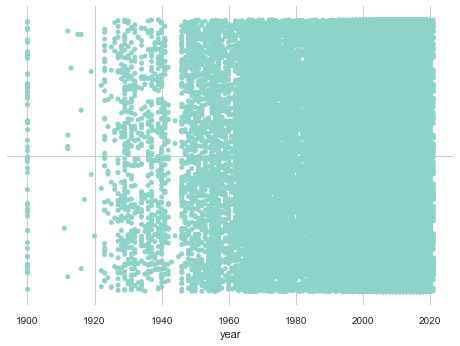

In [22]:
# Checking distribution of year
ax = sns.stripplot( y=df["year"],palette="Set3",orient = 'h' )
ax.grid(True)

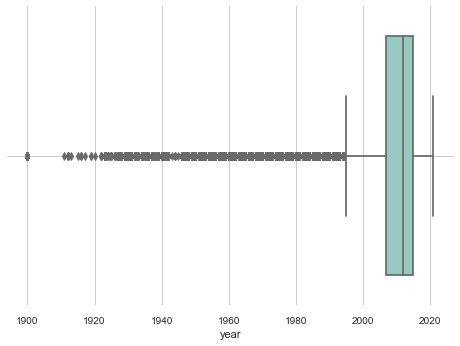

In [20]:
ax = sns.boxplot( y=df["year"],palette="Set3",orient = 'h' )
ax.grid(True)

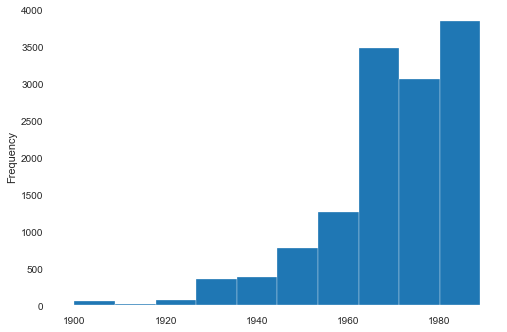

In [29]:
df[df['year'] < 1990] ['year'].plot(kind = 'hist')

In [31]:
df[df['year'] < 1990] ['year'].value_counts(normalize=True) * 100

1987.00   4.77
1989.00   4.73
1988.00   4.05
1986.00   3.75
1966.00   3.68
          ... 
1945.00   0.01
1920.00   0.01
1943.00   0.01
1911.00   0.01
1913.00   0.01
Name: year, Length: 77, dtype: float64

#### Step3 : Observations
1. Year has outliers less than 1990 as seen in box plot ( less than Mean - 3*IQR ) 
2. We see years less than 1990 have under 5% of the data. 
3. We can merge all the data 

In [32]:
df['size']

0               NaN
1               NaN
2               NaN
3          mid-size
4               NaN
            ...    
435844    full-size
435845          NaN
435846      compact
435847          NaN
435848          NaN
Name: size, Length: 435849, dtype: object

### Sample range analysis

In [ ]:
# Check distributions of year
df['year'].describe()

#### Outliers seen for year with values before 1990. Checking for values before 1990

In [ ]:
df[df['year'] < 1990] ['year'].plot(kind = 'hist')

In [ ]:
df_oldyears = df[df.year < 1950]
df.drop(df_oldyears.index, inplace = True)

In [ ]:
# Checking distribution of year after cleanup of old years
df.boxplot(column = ['year'], vert=False)

#### Target variable analysis : PRICE

In [ ]:
# Analysis of the target variable price 
# Outliers present with high values 
df['price'].describe()

In [ ]:
# Checking distribution of year after cleanup of old years
df.boxplot(column = ['price'])

#### price values need to be scaled to provide better visualization
#### will use minmax scaler of sklearn

In [ ]:
scaler = MinMaxScaler()
df['price_scaled'] = scaler.fit_transform(df[['price']].to_numpy())

In [ ]:
df.head(2)

In [ ]:
# Checking distribution of year after cleanup of old years
df.boxplot(column = ['price_scaled'])